# SMS Classifier

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Specify a different encoding when reading the CSV file
df = pd.read_csv(r"C:\Users\HP\Downloads\spam.csv", encoding="latin1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1344,ham,Were somewhere on Fredericksburg,NaN,NaN,NaN
1960,spam,Guess what! Somebody you know secretly fancies...,NaN,NaN,NaN
1341,ham,Just chill for another 6hrs. If you could slee...,NaN,NaN,NaN
2770,ham,No problem. Talk to you later,NaN,NaN,NaN
1026,ham,Yes da. Any plm at ur office,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# Drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2823,ham,No need to buy lunch for me.. I eat maggi mee..
4350,ham,"Night has ended for another day, morning has c..."
2540,ham,"They said if its gonna snow, it will start aro..."
1117,spam,"449050000301 You have won a å£2,000 price! To ..."
4375,spam,"If you don't, your prize will go to another cu..."


In [8]:
# Renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1308,ham,I jokin oni lar.. ÌÏ busy then i wun disturb Ì_.
5331,ham,X course it 2yrs. Just so her messages on mess...
5103,ham,In other news after hassling me to get him wee...
4645,spam,We tried to contact you re your reply to our o...
3495,ham,Happy birthday... May u find ur prince charmin...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()   


target    0
text      0
dtype: int64

In [13]:
#Check for duplicate values
df.duplicated().sum()

403

In [14]:
# Remove Duplicates
df =df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# 2.EDA

In [17]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

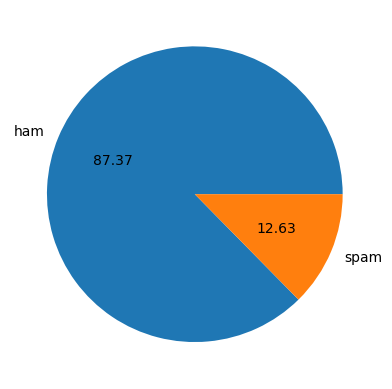

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Create a copy of the DataFrame
df = df.copy()

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# ham sms
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# spam sms
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

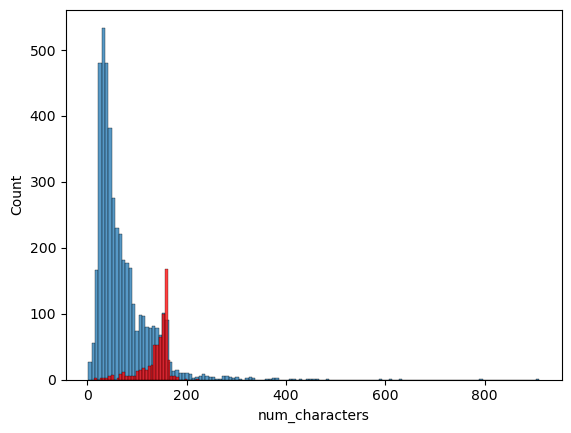

In [34]:
plt.figsize=(12,8)
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

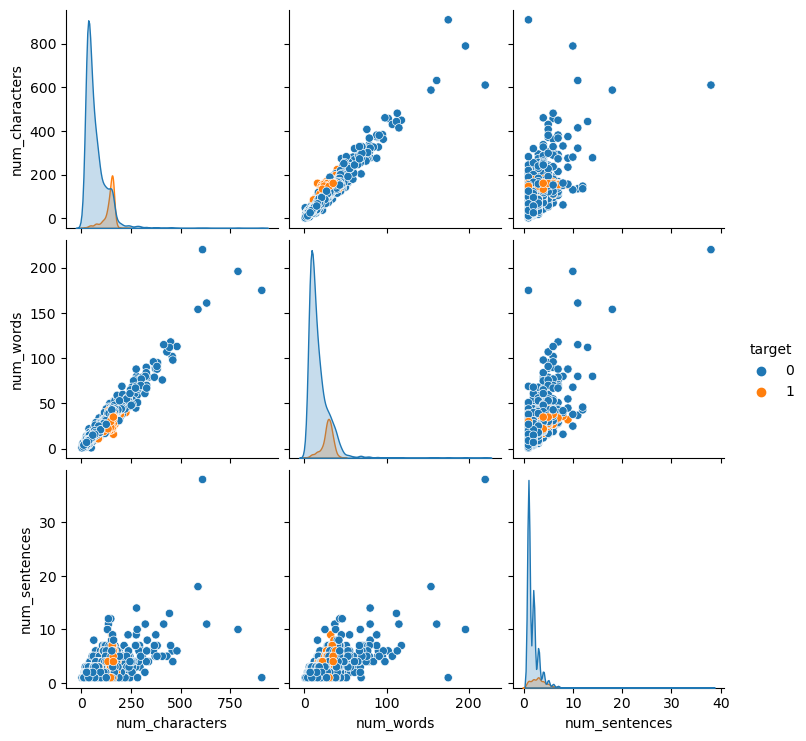

In [35]:
sns.pairplot(df,hue='target')

C:\Users\HP\AppData\Local\Temp\ipykernel_18572\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

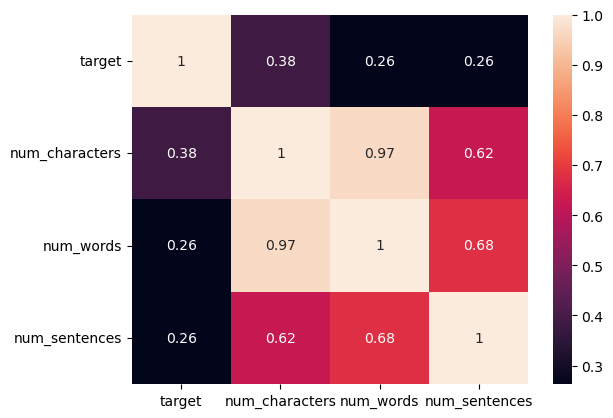

In [36]:
sns.heatmap(df.corr(),annot=True)

# 3. Data preprocessing 



In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
#lower case
def transform_text(text):
    text = text.lower()
    return text

In [39]:
transform_text('Hi how ARe you')

'hi how are you'

In [40]:
# Tokenization
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    return text

In [41]:
transform_text('Hi how ARe you')

['hi', 'how', 'are', 'you']

In [42]:
# Removing characters
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()  # Initialize PorterStemmer
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)    
        
    return " ".join(y)

In [44]:
transform_text('You are a winner U have been specially selected 2 receive å£1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810')

'winner u special select 2 receiv cash 4 holiday flight inc speak live oper 2 claim 0871277810810'

In [45]:
df['text'][159]

'You are a winner U have been specially selected 2 receive å£1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810'

In [46]:
df['transform_text'] = df['text'].apply(transform_text)

In [47]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='yellow')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

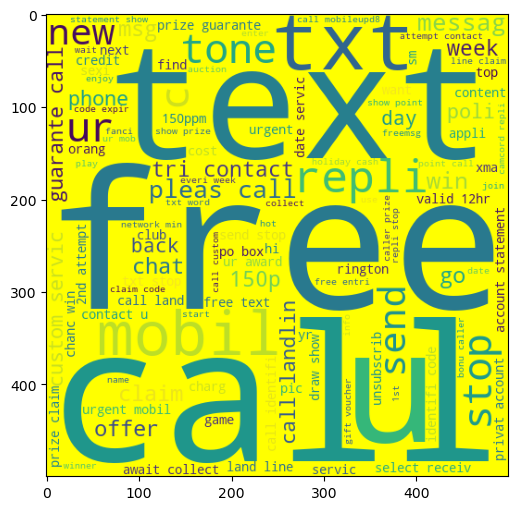

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [51]:
spam_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

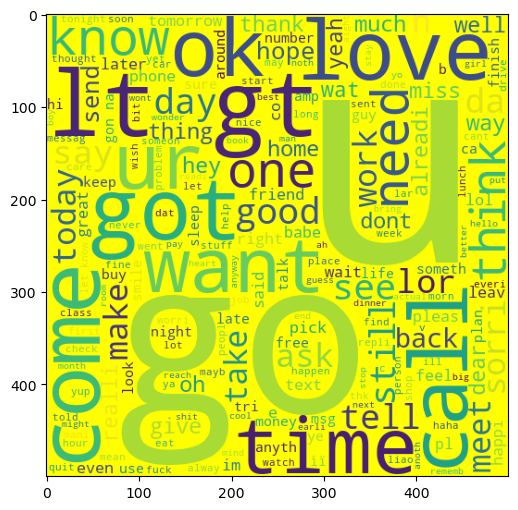

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
df[df['target'] == 1]['transform_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [55]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


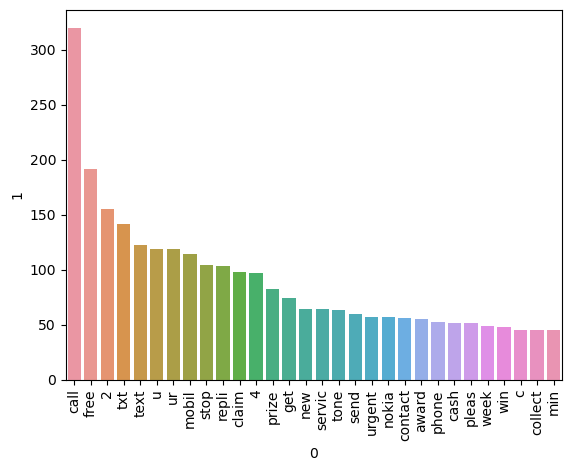

In [58]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35404

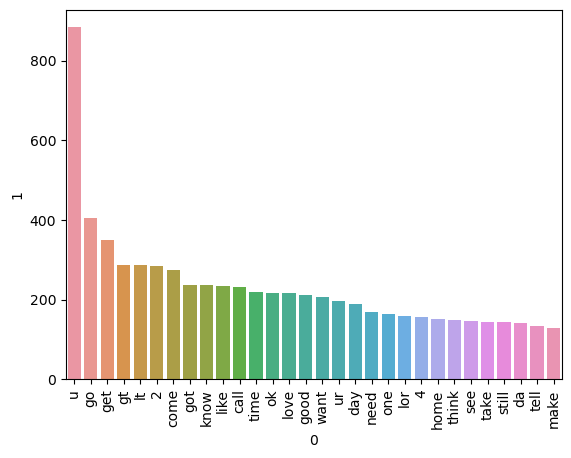

In [61]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
#Text Vectorization
#using bag of words
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.Model Building

In [171]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [172]:
corpus = df['text'].tolist()

In [173]:
X = cv.fit_transform(corpus).toarray()

In [174]:
# Minmixscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [175]:
X.shape

(5169, 8672)

In [176]:
y = df['target'].values

In [177]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [180]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [181]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [182]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9148936170212766
[[824  72]
 [ 16 122]]
0.6288659793814433


In [183]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9816247582205029
[[886  10]
 [  9 129]]
0.9280575539568345


In [184]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[893   3]
 [ 20 118]]
0.9752066115702479


In [143]:
# cv--->bnb

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [145]:
svm = LinearSVC(max_iter=1000)
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [146]:
# creating a dictionary having algorithm names as keys and  their objects as values
clfs={
    'SVC':svc,
    'SVM':svm,
    'KN': knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [147]:
#creating fn "train_classifier" in which we are passing classifier, training and testing data
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [148]:
#calling the function
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9738878143133463, 0.9586776859504132)

In [149]:
# now, I am looping over above dictionary clfs, and catch one algorithm at a time, trained the model and store the accuracy and 
#precision score for every algorithm. And, then convert that accuracy and precision for each algorithm into dataframe

accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy- ",current_accuracy)
    print("Precision- ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy-  0.9738878143133463
Precision-  0.9586776859504132
For  SVM
Accuracy-  0.97678916827853
Precision-  0.9913793103448276
For  KN
Accuracy-  0.9013539651837524
Precision-  1.0
For  NB
Accuracy-  0.9816247582205029
Precision-  0.9280575539568345
For  DT
Accuracy-  0.9410058027079303
Precision-  0.8532110091743119
For  LR
Accuracy-  0.9796905222437138
Precision-  0.9915966386554622
For  RF
Accuracy-  0.9700193423597679
Precision-  1.0
For  AdaBoost
Accuracy-  0.9748549323017408
Precision-  0.9516129032258065
For  BgC
Accuracy-  0.9671179883945842
Precision-  0.9
For  ETC
Accuracy-  0.9777562862669246
Precision-  1.0
For  GBDT
Accuracy-  0.9497098646034816
Precision-  0.9387755102040817
For  xgb
Accuracy-  0.9787234042553191
Precision-  0.967741935483871


In [111]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [112]:
performance_df

,Algorithm,Accuracy,Precision
2,KN,0.912959,1.000000
6,RF,0.970019,1.000000
9,ETC,0.977756,1.000000
1,SVM,0.981625,0.991736
5,LR,0.980658,0.975806
11,xgb,0.978723,0.967742
7,AdaBoost,0.974855,0.951613
10,GBDT,0.949710,0.938776
8,BgC,0.967118,0.900000
3,NB,0.976789,0.880000


In [113]:
performance_df1 = pd.melt(performance_df,id_vars="Algorithm")

In [114]:
performance_df1 

,Algorithm,variable,value
0,KN,Accuracy,0.912959
1,RF,Accuracy,0.970019
2,ETC,Accuracy,0.977756
3,SVM,Accuracy,0.981625
4,LR,Accuracy,0.980658
5,xgb,Accuracy,0.978723
6,AdaBoost,Accuracy,0.974855
7,GBDT,Accuracy,0.949710
8,BgC,Accuracy,0.967118
9,NB,Accuracy,0.976789


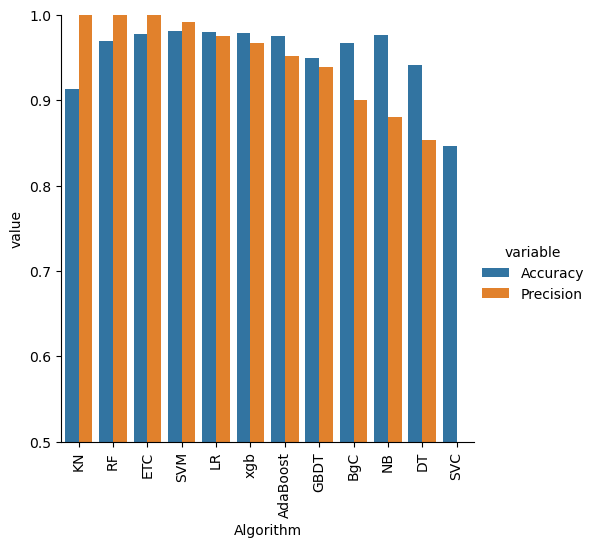

In [150]:
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1 , kind='bar', height=5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [151]:
# model improve
# 1. Change the max_features of Tfidf

In [152]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)


In [153]:
new_temp = performance_df.merge(temp_df,on='Algorithm')

In [148]:
new_temp

,Algorithm,Accuracy_max_ft_3000_x,Precision,Accuracy_max_ft_3000_y,Precision_max_ft_3000
0,KN,0.912959,1.000000,0.912959,1.000000
1,RF,0.970019,1.000000,0.970019,1.000000
2,ETC,0.977756,1.000000,0.977756,1.000000
3,LR,0.980658,0.975806,0.980658,0.975806
4,xgb,0.978723,0.967742,0.978723,0.967742
5,AdaBoost,0.974855,0.951613,0.974855,0.951613
6,GBDT,0.949710,0.938776,0.949710,0.938776
7,BgC,0.967118,0.900000,0.967118,0.900000
8,NB,0.976789,0.880000,0.976789,0.880000
9,DT,0.941006,0.853211,0.941006,0.853211


In [154]:
# again apply for 
# 1. Change the MinMaxScaler
new_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaler': accuracy_scores, 'Precision_scaler': precision_scores}).sort_values('Precision_scaler', ascending=False)


In [155]:
new_df_scaler = new_temp.merge(new_df,on='Algorithm')

In [156]:
new_df_scaler

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaler,Precision_scaler
0,KN,0.912959,1.000000,0.901354,1.000000,0.901354,1.000000
1,RF,0.970019,1.000000,0.970019,1.000000,0.970019,1.000000
2,ETC,0.977756,1.000000,0.977756,1.000000,0.977756,1.000000
3,SVM,0.981625,0.991736,0.976789,0.991379,0.976789,0.991379
4,LR,0.980658,0.975806,0.979691,0.991597,0.979691,0.991597
5,xgb,0.978723,0.967742,0.978723,0.967742,0.978723,0.967742
6,AdaBoost,0.974855,0.951613,0.974855,0.951613,0.974855,0.951613
7,GBDT,0.949710,0.938776,0.949710,0.938776,0.949710,0.938776
8,BgC,0.967118,0.900000,0.967118,0.900000,0.967118,0.900000
9,NB,0.976789,0.880000,0.981625,0.928058,0.981625,0.928058


In [157]:
# Voting Classifier

In [158]:
svc = SVC(kernel='sigmoid', probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [159]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)], voting='soft')

In [160]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(kernel='sigmoid', probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [161]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9903288201160542
Precision 1.0


In [162]:
# Applying Stacking

In [163]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [164]:
from sklearn.ensemble import StackingClassifier

In [165]:
clf = StackingClassifier(estimators, final_estimator=final_estimator)

In [166]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.988394584139265
Precision 0.9846153846153847


In [187]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))